In [1]:
import nltk
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/rickylam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Sentiment Scoring Using SentiWordNet

In [3]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [4]:
def get_sentiment_score(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    #print(text)
    raw_sentences = sent_tokenize(text)
    #print(raw_sentences)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(sentence)
        if len(tokens) == 0:
            continue
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))

    
    return (total_score / len(raw_sentences)) * 100

In [5]:
def get_sentiment_score_breakdown(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
#     print(text)
    raw_sentences = sent_tokenize(text)
#     print(raw_sentences)
    
    for sentence in raw_sentences:
        print('=====')
        
        sent_score = 0     
        sentence = str(sentence)
        print(f'Processing "{sentence}"...')
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(sentence)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            print(f'Score for "{synset.name()}" is {swn_synset.pos_score() - swn_synset.neg_score()}')
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        print('\n')
        print(f'Score of "{sentence}" is {sent_score}')
        print(tokens)
        print(f'Sentence len {len(tokens)}')
        print(f'Average scorce, of each token, is {sent_score / len(tokens)}')
#         this average part is interesting
        total_score = total_score + (sent_score / len(tokens))
    
    print('=====')
    print('=====')
    print(f'Number of sentence in review text is {len(raw_sentences)}')
    print(f'Average scorce, of each sentences, is {total_score / len(raw_sentences)}')
    return (total_score / len(raw_sentences)) * 100

In [6]:
reviews = pd.read_csv("../data/sample_corpus.csv")

In [7]:
reviews.shape

(4500, 12)

In [8]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,False,"01 5, 2001",A1NUEOW1WLQARL,B00004WI4D,Third Shift,"You heard right, this game has no SaveGame. It 'saves' only at the end of each of the 13 levels. The levels are huge, and 1 shot can kill you, or raising the alarm, or 50 other things. They say it's for realism, truth is that Eidos wanted this game out by Xmas. Unless you like being very frustrated, and repeating a level from the start time after time after time, buy something else. If you played SOF on hard setting all the way through without saving, go ahead and get IGI, otherwise you'll have to play this game w/it's 'trainer'. It's a hack that gives you unlimited health, but that takes alot of fun out. Design is monotonous with only 10 buildings that just repeat level after level. So overall, close but no cigar. This COULD have been a cool game w/a savegame and more levels, but it's not. Try NoOneLivesForever or something else AT LEAST until Eidos offers a savegame patch. This game is 95% SOF(great game),and 5% cool, new ideas like cameras,alarms,real weapons, but without varied design & all ruined by an unforgiveable mistake. Save your money.","Some good ideas, but No Save Game & other problems",978652800,2.0,NaN,NaN
1,1.0,False,"08 23, 2016",A3U4WRQMUFFQDS,B00ZQB28XK,J. S. Harvey,Wonder why no one is returning NMS?? sound pretty bad everyone here and youtube saying how horrible it is.,sound pretty bad everyone here and youtube saying how horrible it ...,1471910400,NaN,NaN,NaN
2,1.0,True,"09 21, 2015",A1AGVUZU41WHDH,B00129I75I,Mom J.W.,"The cords were for the X-Box 360 instead of the original X-Box. I did get a refund, though.",Wrong cords,1442793600,NaN,NaN,NaN
3,1.0,False,"05 19, 2015",A2TCG2HV1VJP6V,B000SFK0SE,Ryan Sil. (Gamer &amp; PC/Android indie dev),"Why am I the first person on Amazon to give this a negative review? Parents of 2007 and onward, you all should have realized what you just let your children get a hold of; despite the awesome Cartoon Network show this game is based off of, that's about the only good thing the game provides at all. You'd think a game where you play as an imaginary friend and navigate a giant orphanage full of endless wonder would at least make for decent fun, especially considering this is based off of one episode in particular where they play pretend to defeat evil monsters that were accidentally imagined.\n\nBut no. Imagination Invaders is awful. Awful, awful, awful. It doesn't even try to live up to its name.\n\nYou play as Bloo, and while you do get to roam the halls of Foster's Home, that's pretty much the entire game right there. You go around and search rooms, looking for objects, and then eventually bringing them back to the characters that desired them, and the formula repeats. Yes, I'm serious. This is a Foster's Home for Imaginary Friends game, and that's the best they could come up with. How IMAGINATIVE!\n\nThe game tries sprinkling elements that seem like they should matter on top of the ""action"" but they really don't matter. The Space Nut Boogies walking around? They move too slow, so I can just search almost right in front of them without a care. The transitional minigame where you shoot web at them? I can rapidly tap the stylus on them all I want and they won't be able to do jack. The character abilities obtained by gathering allies? You do these on specially marked tiles, and all they do is allow you to continue with your incredibly boring task of searching for things in those areas that require them.\n\nThat's the keyword: BORING. This game is that, and with a license of this, BORING is the last thing this game should have ever been!",Where's the imagination?,1431993600,NaN,NaN,NaN
4,1.0,True,"01 1, 2013",A38FTSF7HHCII,B007Z3UUF0,Jack Pacini,"I really wanted to like this game. I'm a huge Family Guy fan, so I was excited to see a new Family Guy game. I liked the older one on PS2/XBOX&nbsp;<a data-h

In [9]:
reviews.dropna(subset=['reviewText'], inplace=True)

In [10]:
reviews.shape

(4500, 12)

In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         4500 non-null   float64
 1   verified        4500 non-null   bool   
 2   reviewTime      4500 non-null   object 
 3   reviewerID      4500 non-null   object 
 4   asin            4500 non-null   object 
 5   reviewerName    4498 non-null   object 
 6   reviewText      4500 non-null   object 
 7   summary         4499 non-null   object 
 8   unixReviewTime  4500 non-null   int64  
 9   vote            1342 non-null   float64
 10  style           2706 non-null   object 
 11  image           41 non-null     object 
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 426.3+ KB


In [12]:
reviews[reviews['reviewText'].str.len()<=200][['reviewText']].sample(5)

,reviewText
270,"The picture shows the pre-2013 version but they are selling the 2013 Pro version. Very misleading, especially those of us who prefer the pre-2013 versions."
970,"Game over MAN! Do not play. Don't buy or rent this game, if I could give it no stars that what it would get..."
3059,Love it THANKS!
4296,TX
3346,I've been playing COD since MW2 and this is the best out of the group. Zombie modes are great and all the maps are very memorable.


In [13]:
get_sentiment_score_breakdown(reviews['reviewText'][304])

=====
Processing "I love rechargeable battery packs, but either the charger or the batteries that I got seem to stop charging too early."...
Score for "iodine.n.01" is 0.0
Score for "love.v.01" is 0.5
Score for "rechargeable.s.01" is 0.625
Score for "battery.n.01" is 0.0
Score for "battalion.n.02" is -0.25
Score for "charger.n.01" is 0.125
Score for "battery.n.01" is 0.0
Score for "iodine.n.01" is 0.0
Score for "get.v.01" is 0.125
Score for "look.v.02" is 0.0
Score for "stop.v.01" is 0.0
Score for "charge.v.01" is 0.0
Score for "excessively.r.01" is -0.125
Score for "early.a.01" is 0.0


Score of "i love rechargeable battery packs but either the charger or the batteries that i got seem to stop charging too early" is 1.0
['i', 'love', 'rechargeable', 'battery', 'packs', 'but', 'either', 'the', 'charger', 'or', 'the', 'batteries', 'that', 'i', 'got', 'seem', 'to', 'stop', 'charging', 'too', 'early']
Sentence len 21
Average scorce, of each token, is 0.047619047619047616
=====
Processing "

-0.33768315018315026

In [14]:
reviews['swn_score'] = reviews['reviewText'].apply(lambda text : get_sentiment_score(text))

In [15]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
385,"Single player is interesting. Multiplayer is horrid. Black Ops 3 played better and these new ""rigs"" are a poor substitute for BO3 Specialist.\nI don't touch Infinite Warfare's Multiplayer because of how bad it's gotten. Map designs are horrendous along side the spawn points.\nModern Warfare as nostalgic as it is full of campers and the most hardcore k/d obsessed players but still a fun game in general. The player base is adjusting from jumps to boots on the ground.",-4.513889
3977,"Quality over quanity. If you are looking for a simulator with top tier quality look no further, GTsport has less content but quality over the competition. The Gameplay is second to none and with the free 400+ cars dlc to come you cant really complain. Yes there is no traditional campaign, instead there are challenges that teaches you how to become better behind the wheel. This time the focus is the online and while a regular campaign would have been nice, the online gives you more replayability. A problem with previous gran turismos",3.379974


In [16]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
3963,"That's all I can pretty much say. This game is so realistic, I can't belive my eyes. The graphics are great, the fighting's terrific, and the cops are powerful. Yes, this game's a little, ok a lot, bloody. But this game's not for Christians or protective mothers. This game has some great voice acting. There's some charecters from Sopranos, Twin Peaks, and Time Bandits in this. The radios kick ... also. My favorite is Chatterbox. This game has it all. Amazing.",-0.969517
2690,"The revenant statue is very detailed and feels sturdy. The battery cover on the bottom however was still fused to the bottom plastic therefore I had to carefully cut it to put batteries into mine. Quality control must have taken a brake when this one went by. Other than that everything else worked.\n\nThe game play is much better than DOOM 3 was. No more boring prologue. You get jumped right into the game just like the original DOOM. The glory kills where fun at first then they just became repetitive after a while. It took me just over 12.5 hours to be the game on Ultra-Violence and I found about half of the secret items. All in all I really like this game, it's much better than the typical FPS on the market. I tried to play the multiplayer but would not connect to a game so I didn't bother with it.",-0.053647


### Simple Graph

In [17]:
# we will adjust these number later
positiveScore = 1
negativeScore = 0.5

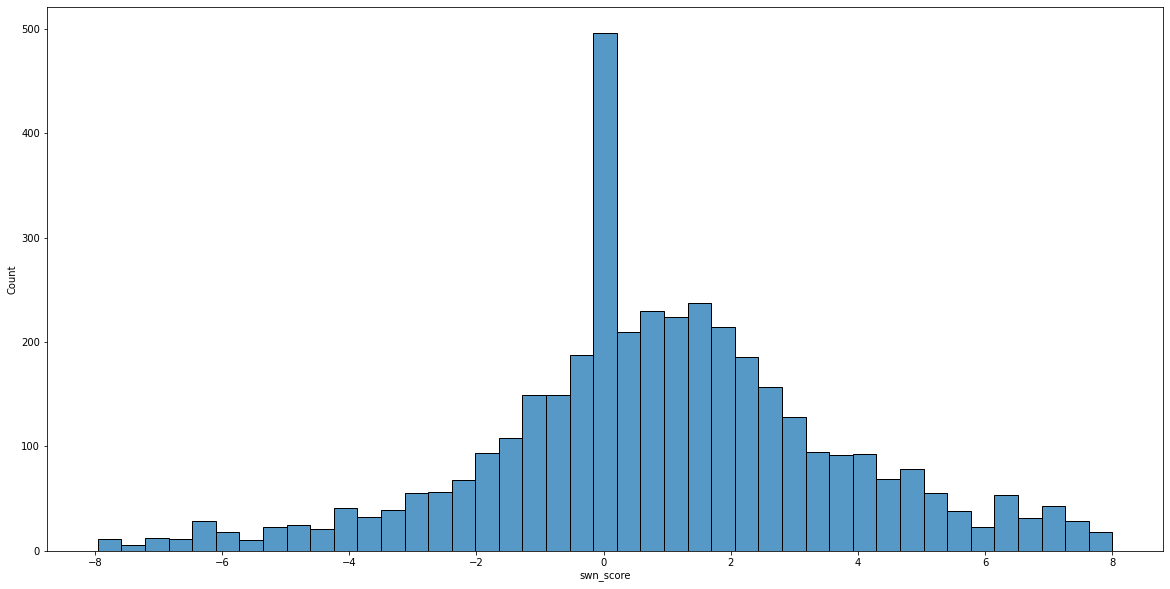

In [18]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='swn_score', data=reviews.query("swn_score < 8 and swn_score > -8"), ax=ax)
# sns.histplot(x='swn_score', data=reviews.query("swn_score > 8"), ax=ax)
# sns.histplot(x='swn_score', data=reviews, ax=ax)
plt.show()

In [19]:
reviews['swn_sentiment'] = reviews['swn_score'].apply(lambda x:
                                                      "positive"
                                                      if x > positiveScore
                                                      else ("negative" if x < negativeScore else "neutral")
                                                     )

In [20]:
reviews['swn_sentiment'].value_counts(dropna=False)

positive    2241
negative    1939
neutral      320
Name: swn_sentiment, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

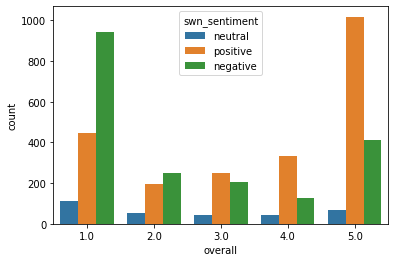

In [21]:
sns.countplot(x='overall', hue='swn_sentiment' ,data = reviews)

<AxesSubplot:xlabel='swn_sentiment', ylabel='overall'>

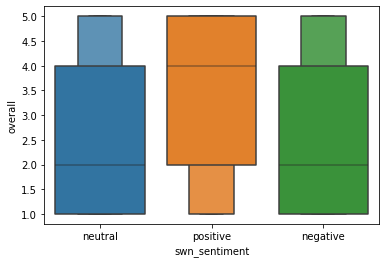

In [22]:
sns.boxenplot(x='swn_sentiment', y='overall', data = reviews)

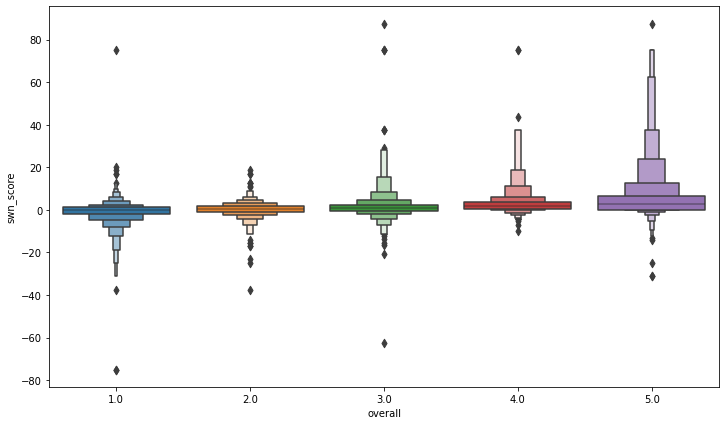

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='swn_score', data = reviews, ax=ax)
plt.show()

In [24]:
reviews['true_sentiment'] = \
    reviews['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [25]:
reviews[['reviewText', 'overall', 'true_sentiment','swn_score', 'swn_sentiment']].sample(5)

,reviewText,overall,true_sentiment,swn_score,swn_sentiment
4220,i ordered this few days back and received it pretty quick.. Its almost complete except for the collectors edition tin case and no game.. But for the price i guess its good deal,5.0,positive,4.600694,positive
4425,"My 10 year old grandsons love this game. They sit in a recliner side by side and take turns hunting. They argue, discuss, laugh and just have fun. Often they come find me or their grandpa to come see what they have killed.",5.0,positive,4.270833,positive
487,No way to filter content. Probably great for sailors.,1.0,negative,0.000000,negative
2997,"Great game, but lacks replay value. Great for going through 1-2 times and then boxing up for later.",4.0,positive,1.041667,positive
3356,"I have played through this game 3 or 4 complete times now...and it's still fun. Missions, looting, the never ending quest for better gear. Funny and chaotic....grab a buddy and play through campaign split screen or on line. Programmers everywhere, please bring back 2 player co op campaign split screen. Games used to bring friends together...now they are all on line. Sit by yourself and play with friends lol Why not hang out with friends and play in the same room?",5.0,positive,1.974357,positive


In [26]:
y_swn_pred, y_true = reviews['swn_sentiment'].tolist(), reviews['true_sentiment'].tolist()

In [27]:
len(y_swn_pred), len(y_true)

(4500, 4500)

In [28]:
from sklearn.metrics import confusion_matrix
swn_cm = confusion_matrix(y_true, y_swn_pred)

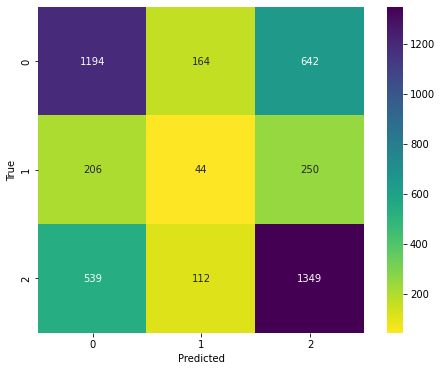

In [29]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(swn_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

## Performance Assessment

In [30]:
swn_cm_list = list(swn_cm.ravel())

In [31]:
swn_cm_list

[1194, 164, 642, 206, 44, 250, 539, 112, 1349]

### Negative Sentiment Prediction Assessment

Consider 'negative' sentiment result

In [32]:
tp = swn_cm_list[0]
tn = swn_cm_list[4] + swn_cm_list[5] + swn_cm_list[7] + swn_cm_list[8]
fp = swn_cm_list[3] + swn_cm_list[6]
fn = swn_cm_list[1] + swn_cm_list[2]

In [33]:
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = (2*tp) / (2*tp + fp + fn)

print(f"""recall: {recall}
specificity: {specificity}
precision: {precision}
f1 score: {f1}""")

recall: 0.597
specificity: 0.702
precision: 0.6157813305827746
f1 score: 0.6062452399086062


### Positive Sentiment Prediction Assessment

Consider 'positive' sentiment result

In [34]:
tp = swn_cm_list[8]
tn = swn_cm_list[0] + swn_cm_list[1] + swn_cm_list[3] + swn_cm_list[4]
fp = swn_cm_list[2] + swn_cm_list[5]
fn = swn_cm_list[6] + swn_cm_list[7]

In [35]:
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = (2*tp) / (2*tp + fp + fn)

print(f"""recall: {recall}
specificity: {specificity}
precision: {precision}
f1 score: {f1}""")

recall: 0.6745
specificity: 0.6432
precision: 0.6019634091923248
f1 score: 0.6361707144541382


## Sentiment Scoring Model Using NLTK Opinion Lexicon

In [36]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize

In [37]:
nltk.download("opinion_lexicon")

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/rickylam/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [38]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [39]:
pos_words[:5]

['a+', 'abound', 'abounds', 'abundance', 'abundant']

In [40]:
neg_words[:5]

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable']

In [41]:
def get_sentiment_score_oplex(text):
    
    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    raw_sentences = sent_tokenize(text)
#     print(f'reviewText {text}')
#     print(f'raw_sentences {raw_sentences}')
    
    for sentence in raw_sentences:
        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(sentence)
#         print(f'tokens {tokens}')
        if len(tokens) == 0:
            continue
    
    
        for token in tokens:
            if token in pos_words:
                sent_score = sent_score + 1
            elif token in neg_words:
                sent_score = sent_score - 1
        
#         print(f'sent_score {sent_score}')
        total_score = total_score + (sent_score / len(tokens))

    return total_score

In [42]:
get_sentiment_score_oplex(reviews['reviewText'][654])

0.08333333333333333

In [43]:
reviews['oplex_sentiment_score'] = reviews['reviewText'].apply(lambda x: get_sentiment_score_oplex(x))

In [44]:
reviews[['reviewText', 'swn_score', 'oplex_sentiment_score']].sample(5)

,reviewText,swn_score,oplex_sentiment_score
256,"This controler stinks. The joystick is messed up and turned at a slight angle (so you have to go slightly up and right to go straight up), the rubber grips fall off in the first week, and worst of all, it's confusing. I tried programing the buttons (because it's ""fully programable"") and believe it or not it works! sure you can't train whole sets of commands (like moves in fighting games) in, only replot the buttons but it works. The only problem comes in when you accidently press the clear button with a light in it and all of the sudden, none of the buttons perform the X action. Then, this controller will probably be unplugged and sent to the attic just like mine. Enjoy!:(",-3.454384,0.814148
1553,"The Xbone version is a lot better than the 360 version.\n\nIt has better graphics and more players. This game was designed for the Xbone and PS4, but it feels like the developers lost there way. The colors in the game are dull and washed. The game feels like a 6 year old pc game. The maps feel big , even for 18 players on ground war. The lag is still present, better than I remember in black ops 2. doesn't run as smooth as MW2 though.\n\nOver all, it feels like a DLC for black Ops 2 and not a standalone game. I rented it and I can't recommend it to anyone and I don't plan on buy it.\n\nHopefully someone can make a quality MP FPS soon.\n\nPointlessly shoot zombies/aliens for points/money to buy a gun on a wall ^check.\nOne hit-kill quickscope Snipers and autoaim-knifing ^ Check .\nThrowing Knives ^ Check\nSame Perks/killstreaks ^check\nGetting shot by someone before you see them ^check\nGetting shot after spawning ^check\nSomeone spawning behind you and killing you ^check\nCampers ^ Check\nShotguns overpowered ^ Check\nPeople Boosting ^check\nMaps are designed so you always get killed from behind or side. ^check\nSound Whoring ^Check",1.964174,0.275389
2971,"This is the first game of the Mass Effect series. A heads-up, it does start off a little bit slow. However, the story eventually picks up and the way they introduce the story up until the end of the game is amazing. Mass Effect 2 and Mass Effect 3 just jump right into the action, which I appreciate. I would definitely recommend this game!",-0.475379,0.237121
3492,Love it,25.000000,0.500000
2501,"I thought I already wrote a review on this, but maybe not.\nThis game has all the pros and no cons. That's right, I\nhave no complaints. Everything about the game is fun,\nand there are no ""stupid"" missions thrown in to just make\nit more lengthy. You have multiple ways of completing\ntasks, which gives it great replay value. Personally, I\nhave not lived up to being a Silent Assassin. I prefer\nto kill as many people as possible, innocent bystanders if\nnecessary, to get the job done. If my ranking isn't\nmass murderer, then I feel as though I've failed. There's\nnothing more satisfying than blasting bad guys in the skull,\nstripping them down to their boxers and leaving them\nlaying lifelessly in their own pool of blood. This game\nhas a save anywhere feature which most games of this\nnature seem to neglect. Of all the PS2 games I now own,\nthis has to be in my top 5. Oh yeah, of all the PS2 games\nI couldn't wait to get rid of, ""No One Lives Forever"" is\nmy #1. That game is worthless and I'm ashamed to have been\na previous owner. Too bad there's no support groups for\npeople suffering from ... video games like that one.",0.443942,-0.280769


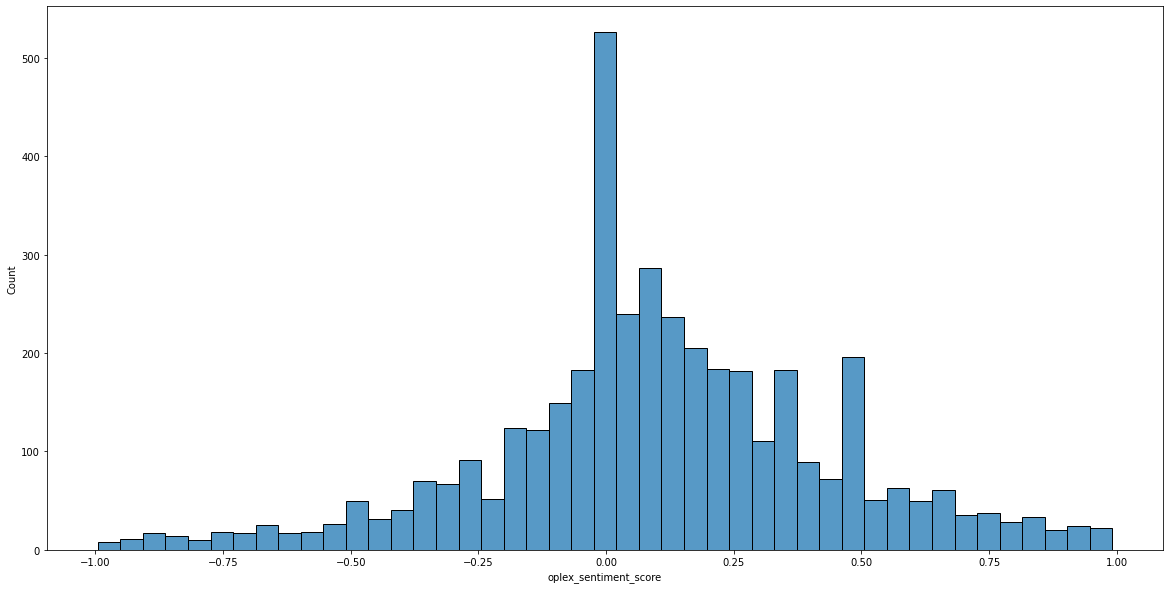

In [45]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(
    x = 'oplex_sentiment_score',
    data = reviews.query("oplex_sentiment_score < 1 and oplex_sentiment_score > -1"),
    ax = ax
)
plt.show()

In [46]:
reviews['oplex_sentiment'] = \
    reviews['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))

In [47]:
reviews['oplex_sentiment'].value_counts(dropna=False)

positive    2207
negative    1362
neutral      931
Name: oplex_sentiment, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

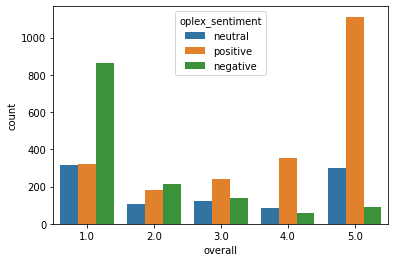

In [48]:
sns.countplot(x='overall', hue='oplex_sentiment' ,data = reviews)

<AxesSubplot:xlabel='oplex_sentiment', ylabel='overall'>

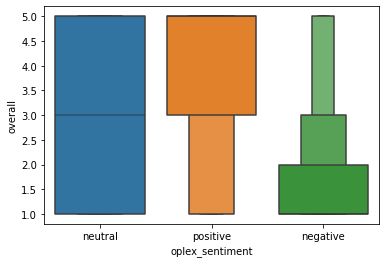

In [49]:
sns.boxenplot(x='oplex_sentiment', y='overall', data = reviews)

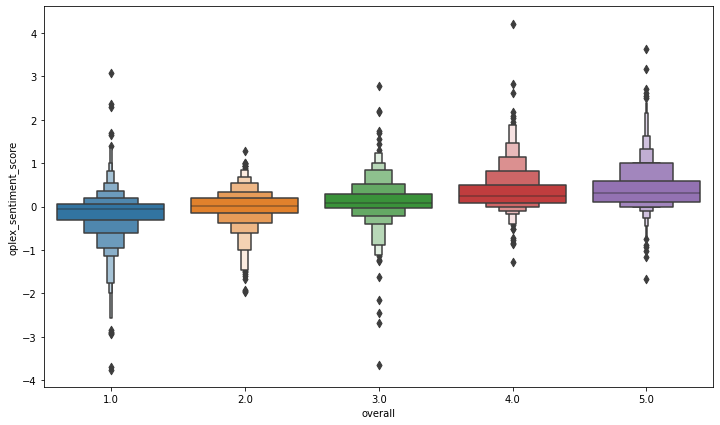

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='oplex_sentiment_score', data = reviews, ax=ax)
plt.show()

In [51]:
y_oplex_pred = reviews['oplex_sentiment'].tolist()

In [52]:
oplex_cm = confusion_matrix(y_true, y_oplex_pred)

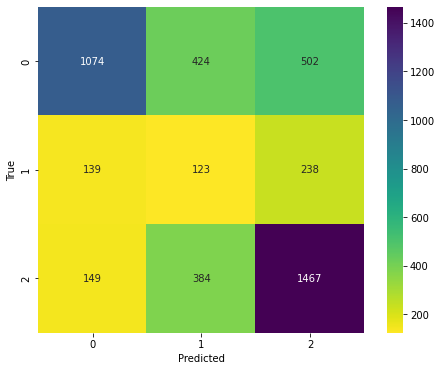

In [53]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

In [54]:
oplex_cm_list = list(oplex_cm.ravel())

In [55]:
oplex_cm_list

[1074, 424, 502, 139, 123, 238, 149, 384, 1467]

### Negative Label Assessment

In [56]:
tp = oplex_cm_list[0]
tn = oplex_cm_list[4] + oplex_cm_list[5] + oplex_cm_list[7] + oplex_cm_list[8]
fp = oplex_cm_list[3] + oplex_cm_list[6]
fn = oplex_cm_list[1] + oplex_cm_list[2]

In [57]:
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = (2*tp) / (2*tp + fp + fn)

print(f"""recall: {recall}
specificity: {specificity}
precision: {precision}
f1 score: {f1}""")

recall: 0.537
specificity: 0.8848
precision: 0.788546255506608
f1 score: 0.6389054134443783


### Positive Label Assessment

In [58]:
tp = oplex_cm_list[8]
tn = oplex_cm_list[0] + oplex_cm_list[1] + oplex_cm_list[3] + oplex_cm_list[4]
fp = oplex_cm_list[2] + oplex_cm_list[5]
fn = oplex_cm_list[6] + oplex_cm_list[7]

In [59]:
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = (2*tp) / (2*tp + fp + fn)

print(f"""recall: {recall}
specificity: {specificity}
precision: {precision}
f1 score: {f1}""")

recall: 0.7335
specificity: 0.704
precision: 0.6647032170367014
f1 score: 0.6974090801045876


### More 

In [60]:
swn_oplex_cm = confusion_matrix(y_swn_pred, y_oplex_pred)

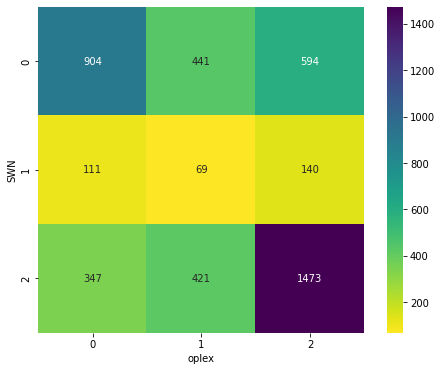

In [61]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(swn_oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('oplex')
ax.set_ylabel('SWN');

In [62]:
reviews.sample(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,swn_score,swn_sentiment,true_sentiment,oplex_sentiment_score,oplex_sentiment
1280,1.0,True,"04 22, 2017",A13WIP4FMBMS6Q,B000F6W8AE,Amazon Customer,Did not work.,One Star,1492819200,NaN,NaN,NaN,-20.833333,negative,negative,0.333333,positive
3021,5.0,False,"11 20, 2013",A2SEYD5DRDM9AU,B00BMFIXT2,D. Coffee,"I've played every Assassin's Creed so far, and I think Black Flag has superseded AC: Brotherhood as the best overall in the entire franchise. I'm extremely happy to be able to say that, because after the tragedy that was AC: Revelations and AC3 which was lukewarm at best, AC4 has renewed my faith in the franchise.\n\nWhat's good: ALMOST EVERYTHING\n\n- Storyline is phenomenal: long, but never gets boring, with plenty of interesting missions, variety of locations and activities, and characters with depth and personality. It rivals the storyline of AC2, which was, to this point, my undisputed winner for the best story of any AC so far. Additionally, the interspersing of Animus play with time in the ""present day"" is very well-constructed and helps advance the overarching storyline without detracting from the player's chance to rampage through the Caribbean.\n\n- Gameplay is AWESOME: Everything that was great about Brotherhood and 3, plus new equipment, combat maneuvers and enemies that add depth of strategy and that truly reward a skilled player. One particular highlight is the mad chaos of boarding a large enemy vessel and the non-stop, frenetic action that comes with slicing, dicing and gunning your way through 20 enemy soldiers in the span of a minute or two.\n\n- Graphics are great, although that's not the thing that makes the game. I would not (respectfully) agree with another reviewer who stated that the world is even more diverse and beautiful than Skyrim (I didn't have nearly as many ""Oh my god, this game is BEAUTIFUL"" moments in AC4 as I did in Skyrim), but nonetheless AC4 IS beautiful and well-constructed, with a mix of large cities and smaller remote island locations and underwater wrecks (which are really cool, but SCREW MORAY EELS). Another nice element is that each city has its own unique character and feel.\n\n- Economy and Upgrades are far-improved and streamlined from AC3. Gone is the cumbersome economy system of 3, replaced by a much more straightforward method of looting ships and selling cargo, the Kenway's fleet system, and a few other methods of acquiring money. Upgrades are very similar to Far Cry 3, whereby you must hunt and harpoon various wild creatures in order to acquire the necessary materials to craft upgrades. It's simple, but it works very well, and it integrates hunting into the game in a way that is much better than anything AC3 ever did.\n\nWhat needs improvement:\n\n- There was this ONE TIME in ONE MISSION that I thought was poorly done (overpowered boss crap...).\n\nAND THAT'S HONESTLY ALL I CAN THINK OF.\n\nAnd to Ubisoft: I hereby forgive you for Revelations.",The Best AC Yet!,1384905600,3.0,{'Format:': ' Video Game'},NaN,2.658093,positive,positive,0.578645,positive
1937,2.0,True,"03 16, 2015",A2FZJPHJZO58PX,B00BMFIXOW,maria,OK,OK,1426464000,NaN,{'Format:': ' Video Game'},NaN,0.000000,negative,negative,0.000000,neutral
632,1.0,False,"10 24, 2014",ASRA2UZ3JV87B,B00J128FO6,Navarro Parker,"The Playstation 4 was designed to cool itself. Adding a fan unit like this product it only wasting energy and creating more noise. If you are having problems with your PS4 overheating, you should return it. If used in properly ventilated areas, it should never overheat. Do you strap on extra fans to any other device you own? Why do video game consoles need one?",Pointless product. PS4 cools itself just fine.,1414108800,3.0,{'Platform:': ' PlayStation 4'},NaN,-3.951656,negative,negative,0.064744,neutral
2545,4.0,False,"06 10, 2015",A2IXIWDGJJ6450,B00GZ1GUNO,paul arce,Never was a tomb raider fan but 